James Cook

CSC373 Final Portfolio

## Data

### Introduction

I took STA112: Introduction to Data Science as an elective last year. At the beginning of the semester, we used a dataset called 'penguins' for our introduction to plotting in RStudio. The dataset instantly struck me as a perfect dataset for generating examples, examples beyond just simple plotting. I think a number of features make the dataset an ideal dataset to practice implementing the concepts we have learned this semester in a manner that would make this portfolio a resource I could use in the future.

### Data Summary

The [penguins](https://www.kaggle.com/datasets/larsen0966/penguins) dataset contains 342 observations of 8 features regarding three species of penguins found on three islands in the Antarctic region. The data was collected by Dr. Kristin Gorman and the Palmer Station, Antarctica LTER (Long Term Ecological Research Network) between 2007 - 2009.

The dataset contains the following features:
* Species (Nominal; Adiele/Gentoo/Chinstrap)
* Island (Nominal; Torgersen, Biscoe, Dream)
* Bill Length (Continuous, measured in mm)
* Bill Depth (Continuous, measured in mm)
* Flipper Length (Continuous, measured in mm)
* Body Mass (Continuous, measured in g)
* Sex (Binary Nominal; Male/Female)
* Year (Discrete?, 2007/2008/2009)

A small number of the observations do have N/A values present and will need to be dropped.



## Setup

In [ ]:
# From most recent NLP lab: change directory within os for ease of path
import os
os.chdir('/content/drive/MyDrive/Cook_James_CSC_373/Final Portfolio')

In [2]:
# Read Data

import pandas as pd
import numpy as np

PATH = 'Data/penguins.csv'
penguins = pd.read_csv(PATH, index_col = 0)

In [3]:
# Initial look at data

penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
9,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
10,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


In [4]:
# Print rounded summary statistics

penguins.describe().round(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000,342.000,342.000,342.000,344.000
mean,43.922,17.151,200.915,4201.754,2008.029
std,5.460,1.975,14.062,801.955,0.818
min,32.100,13.100,172.000,2700.000,2007.000
25%,39.225,15.600,190.000,3550.000,2007.000
50%,44.450,17.300,197.000,4050.000,2008.000
75%,48.500,18.700,213.000,4750.000,2009.000
max,59.600,21.500,231.000,6300.000,2009.000


In [6]:
# Eleven of the observations contain an N/A value which would impact future testing. This chunk removes those from the dataframe.

penguins_no_na = penguins.dropna()
initial_length = len(penguins)
new_length = len(penguins_no_na)
na_count = initial_length - new_length
print("Original length:\t", len(penguins))
print("After Dropping NA:\t", len(penguins_no_na))
print("Dropped:\t\t", na_count, "\n")

penguins_no_na.head(10)

Original length:	 344
After Dropping NA:	 333
Dropped:		 11 



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
7,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
8,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
13,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007
14,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007
15,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007


## Data visualization

I think it's important to visualize the data set before moving forward. These are a few multivariate plots designed to help get a better understanding of the data.



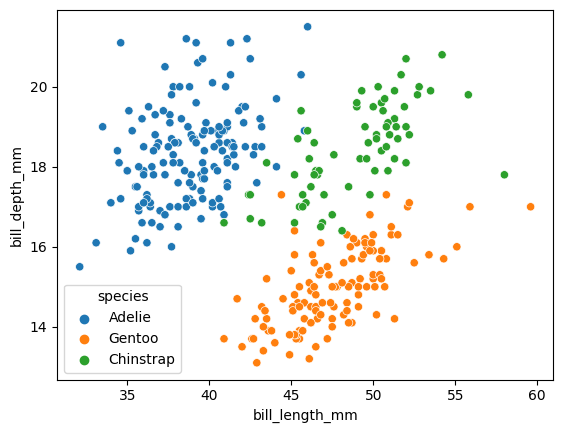

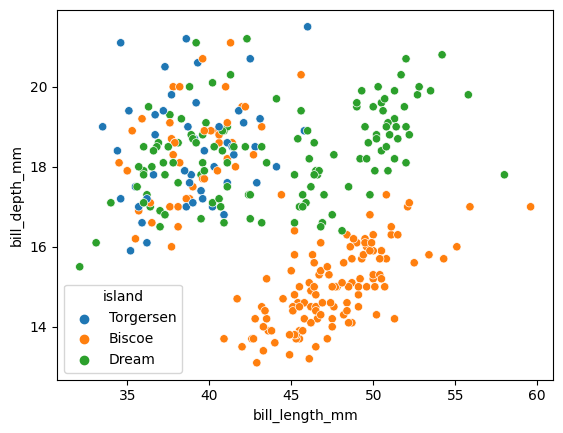

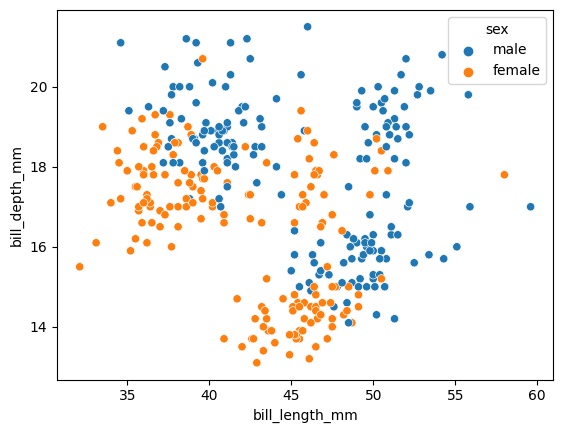

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_no_na, hue='species')
plt.show()

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_no_na, hue='island')
plt.show()

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_no_na, hue='sex')
plt.show()


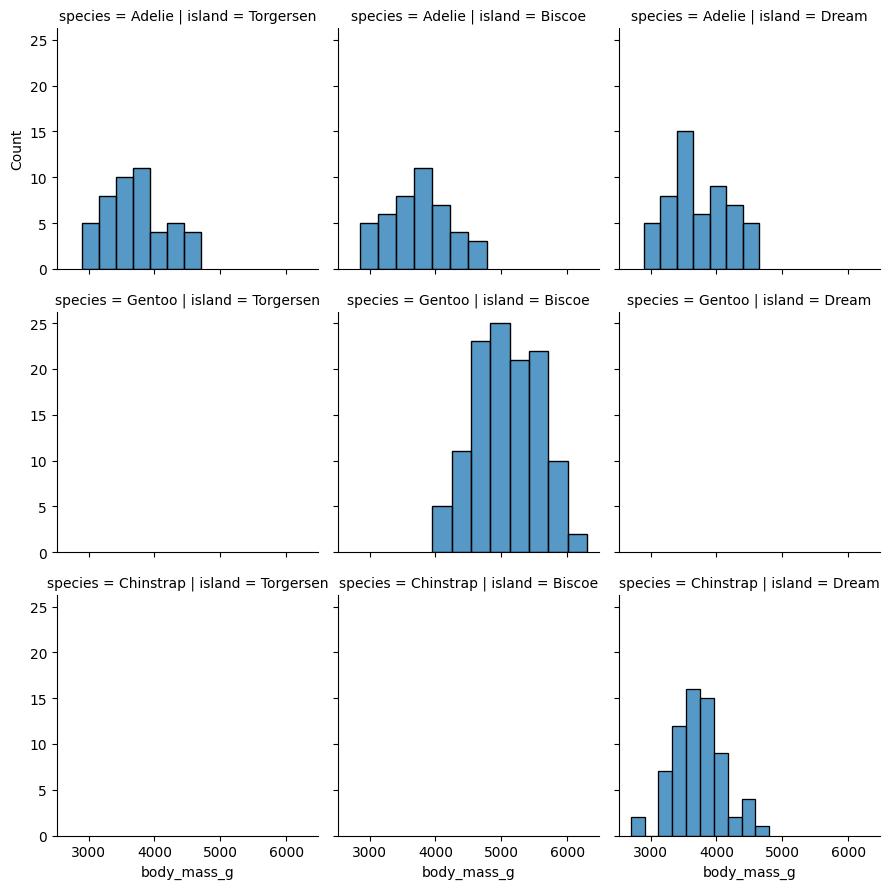

In [9]:
# Inspired by https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid

grid = sns.FacetGrid(penguins_no_na, col="island",  row="species")
grid.map_dataframe(sns.histplot, x="body_mass_g")

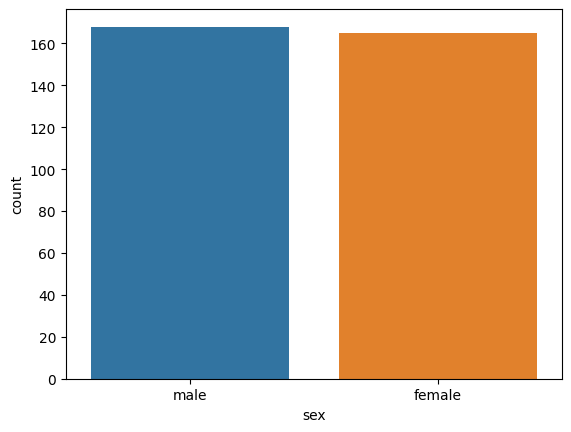

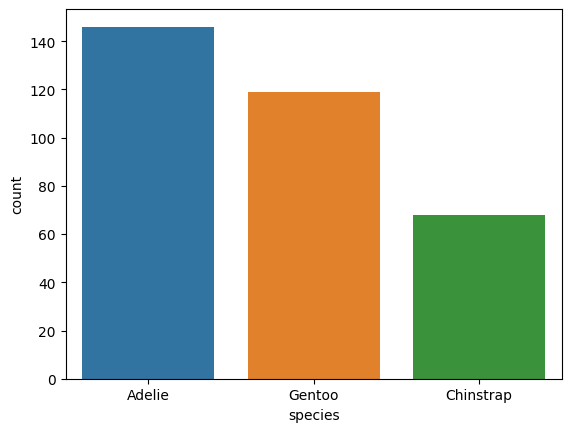

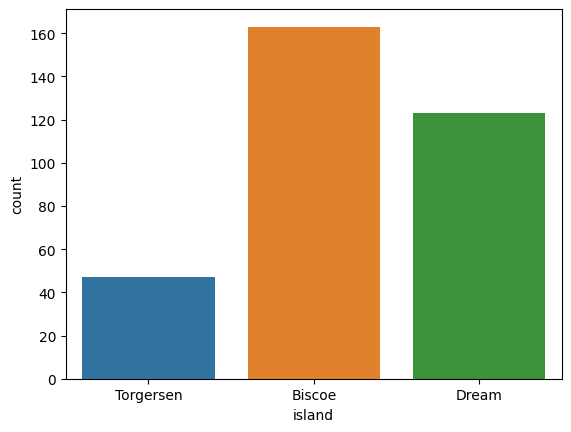

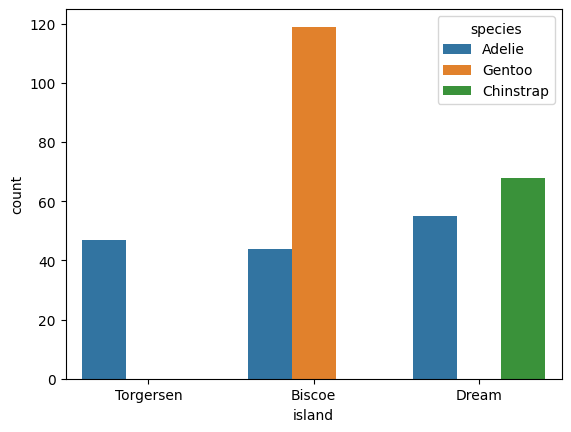

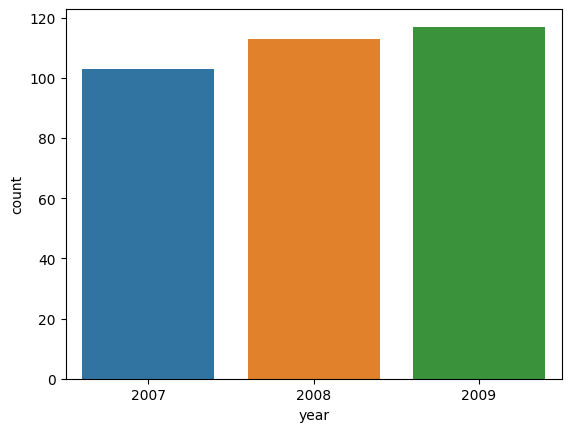

In [10]:
# From documentation https://seaborn.pydata.org/generated/seaborn.countplot.html

sns.countplot(data = penguins_no_na, x = 'sex')
plt.show()
sns.countplot(data = penguins_no_na, x = 'species')
plt.show()
sns.countplot(data = penguins_no_na, x = 'island')
plt.show()
sns.countplot(data = penguins_no_na, x = 'island', hue = 'species')
plt.show()
sns.countplot(data = penguins_no_na, x = 'year')
plt.show()

## Classification Data Cleanup

For my classification tests, I wanted to test a binary attribute and see how well various approaches compared against each other. The only binary variable in my dataset is the sex of the penguin (i.e. male or female), so that was the variable I have chosen to try to classify.

As there are a number of categorical variables in the data set, I also implemented the "get_dummies" function to add dummy variables, effectively allowing the code to treat these categorical variables as numerical and take them into consideration.

Finally, this chunk splits the data into a training set and a testing set.

I will note as well that the way I have my "classify_stats" method set up, my classification tests are effectively testing each approach's ability to classify the penguins <i>as males</i>.

Therefore:

*   True Positive: Correct prediction of male
*   True Negative: Correct prediction of female
*   False Postive: Incorrect prediction of male (should be female)
*   False Negative: Incorrect prediction of female (should be male)

Review of Summary Statistics:


*   Prevalence: FP / (TN + FP)
*   Accuracy: (TP + TN) / (TP + TN + FP + FN)
*   Sensitivity: 1 - ((FN) / (FN + TP))
*   Specificity: TN / (TN + FP)
*   Precision: TP / (TP + FP)

My main focus is on <i>Accuracy</i>, which measures the overall rate of correct predictions and in my opinion is the best test for a comparison.



In [14]:
from sklearn.model_selection import train_test_split

# Extract Class
labels = penguins_no_na["sex"]
predict_sex = penguins_no_na.drop(['sex'], axis=1)
dummies = pd.get_dummies(predict_sex)

# print(predict_sex)
# print(labels)

TRAIN_FRAC = 0.3
x_train, x_test, y_train, y_test = train_test_split(dummies, labels, test_size = TRAIN_FRAC, random_state = 8)

print("Training:\t", len(x_train))
print("Testing:\t", len(x_test))



Training:	 233
Testing:	 100


## Classification
#### Decision Tree
#### Naive Bayes
#### ANN
#### Ensemble Tactics
#### Instance Based Learning


In [15]:
# CLASSIFY_STATS

# Inputs need to be in the form [Prediction, Actual]
def classify_stats(inputs):
  # TP = True Positive, TN = True Negative, etc
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for item in inputs:
    # True positive
    if item[0] == 'male' and item[1] == 'male':
      TP += 1
    # True Negative
    elif item[0] == 'female' and item[1] == 'female':
      TN += 1
    # False Negative
    elif item[0] == 'female' and item[1] == 'male':
      FN += 1
    # False Positive
    elif item[0] == 'male' and item[1] == 'female':
      FP += 1

  # To return a list value
  stats = []
  # Prevalence
  prevalence = FP / (TN + FP)

  # Accuracy
  accuracy = (TP + TN) / (TP + TN + FP + FN)

  # Sensitivity
  FN_rate = (FN) / (FN + TP)
  sensitivity = 1 - FN_rate

  # Specificity
  specificity = TN / (TN + FP)

  # Precision
  precision = TP / (TP + FP)

  # PPV
  PPV = TP / (TP + FP)

  stats.append(prevalence)
  stats.append(accuracy)
  stats.append(sensitivity)
  stats.append(specificity)
  stats.append(precision)
  stats.append(PPV)

  # For formatting, format again in next block of code but figured I would do it here anyway
  formatted_stats= []
  for stat in stats:
    formatted = "{:.3f}".format(stat)
    formatted_stats.append(formatted)

  print("Formatted: ")
  print(formatted_stats)

  return formatted_stats

In [16]:
def quick_output(formatted_stats):
  prev = float(formatted_stats[0])
  accur = float(formatted_stats[1])
  sens = float(formatted_stats[2])
  spec = float(formatted_stats[3])
  prec = float(formatted_stats[4])
  ppv = float(formatted_stats[5])

  print("{:14s} {:.3f}".format("Prevalence:", prev))
  print("{:14s} {:.3f}".format("Accuracy:", accur))
  print("{:14s} {:.3f}".format("Sensitivity:", sens))
  print("{:14s} {:.3f}".format("Specificity:", spec))
  print("{:14s} {:.3f}".format("Precision:", prec))
  print("{:14s} {:.3f}".format("PPV:", ppv))

In [17]:
# Frame to later compare results
rownames = ["Prevalence", "Accuracy", "Sensitivity", "Specificity", "Precision", "PPV"]
classification_stats = pd.DataFrame(rownames, columns = ["Classifier"])
classification_stats

#def add_stats(classifier_name, stats, classification_stats):




,Classifier
0,Prevalence
1,Accuracy
2,Sensitivity
3,Specificity
4,Precision
5,PPV


Formatted: 
['0.241', '0.830', '0.913', '0.759', '0.764', '0.764']
Prevalence:    0.241
Accuracy:      0.830
Sensitivity:   0.913
Specificity:   0.759
Precision:     0.764
PPV:           0.764


[Text(0.5, 0.9, 'x[3] <= 3712.5\nentropy = 0.998\nsamples = 233\nvalue = [111, 122]'),
 Text(0.3, 0.7, 'x[1] <= 18.55\nentropy = 0.684\nsamples = 77\nvalue = [63, 14]'),
 Text(0.2, 0.5, 'x[0] <= 48.3\nentropy = 0.124\nsamples = 59\nvalue = [58, 1]'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(0.3, 0.3, 'entropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.4, 0.5, 'entropy = 0.852\nsamples = 18\nvalue = [5, 13]'),
 Text(0.7, 0.7, 'x[1] <= 14.85\nentropy = 0.89\nsamples = 156\nvalue = [48, 108]'),
 Text(0.6, 0.5, 'entropy = 0.406\nsamples = 37\nvalue = [34, 3]'),
 Text(0.8, 0.5, 'x[3] <= 5025.0\nentropy = 0.523\nsamples = 119\nvalue = [14, 105]'),
 Text(0.7, 0.3, 'x[1] <= 15.55\nentropy = 0.664\nsamples = 81\nvalue = [14, 67]'),
 Text(0.6, 0.1, 'entropy = 0.811\nsamples = 8\nvalue = [6, 2]'),
 Text(0.8, 0.1, 'entropy = 0.499\nsamples = 73\nvalue = [8, 65]'),
 Text(0.9, 0.3, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38]')]

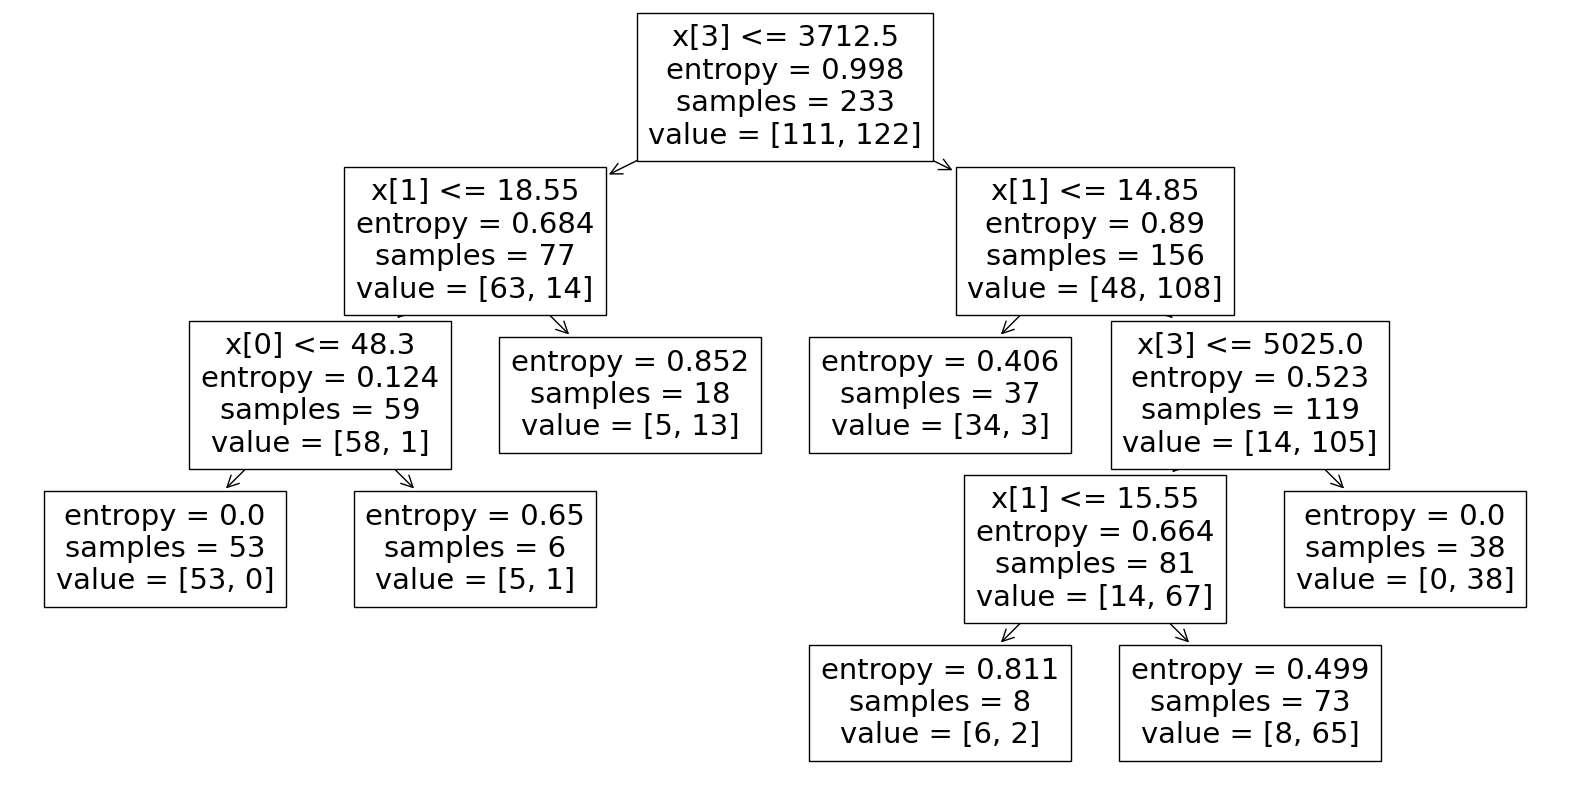

In [18]:
# DECISION TREE
# Note for all package use: Most packages implemented utilized the official documentation for each package.

from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.tree import export_text

# From Decision Tree Assignment
TREE_CRITERION = "entropy"
MAX_TREE_DEPTH = 4
MIN_SPLIT = 50
MIN_IMPURITY_DECREASE = 0.1
MIN_IMPURITY_MIN = 0.0
MIN_IMPURITY_DECR = 0.015

GRAPH_HEIGHT = 10
GRAPH_WIDTH = 20

# #Loop on some decision tree parameter.
while(MIN_IMPURITY_DECREASE >= MIN_IMPURITY_MIN) and (MIN_IMPURITY_DECREASE - MIN_IMPURITY_DECR > 0):
  MIN_IMPURITY_DECREASE -= MIN_IMPURITY_DECR

  clf = tree.DecisionTreeClassifier(max_depth = MAX_TREE_DEPTH, min_samples_split=MIN_SPLIT, criterion=TREE_CRITERION, min_impurity_decrease = MIN_IMPURITY_DECREASE)
  clf = clf.fit(x_train, y_train)
  pred_actual = []
  pred = clf.predict(x_test)
  for i in range(len(pred)):
    pred_actual.append([pred[i], y_test.iloc[i]])

my_stats = classify_stats(pred_actual)
quick_output(my_stats)
classification_stats["Decision Tree"] = my_stats

plt.figure(figsize = (GRAPH_WIDTH, GRAPH_HEIGHT))
tree.plot_tree(decision_tree=clf, max_depth = MAX_TREE_DEPTH)

In [19]:
# NAIVE BAYES

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
bayes = gnb.fit(x_train, y_train)
predictions = bayes.predict(x_test)
# print(predictions)
pred_actual = []
for i in range(len(predictions)):
    pred_actual.append([predictions[i], y_test.iloc[i]])
my_stats = classify_stats(pred_actual)
quick_output(my_stats)
classification_stats["Naive Bayes"] = my_stats

Formatted: 
['0.185', '0.790', '0.761', '0.815', '0.778', '0.778']
Prevalence:    0.185
Accuracy:      0.790
Sensitivity:   0.761
Specificity:   0.815
Precision:     0.778
PPV:           0.778


In [20]:
# ANN

from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier(random_state = 8, max_iter = 500).fit(x_train, y_train)
predictions = ANN.predict(x_test)

pred_actual = []
for i in range(len(predictions)):
    pred_actual.append([predictions[i], y_test.iloc[i]])
my_stats = classify_stats(pred_actual)
quick_output(my_stats)
classification_stats["ANN"] = my_stats


Formatted: 
['0.074', '0.660', '0.348', '0.926', '0.800', '0.800']
Prevalence:    0.074
Accuracy:      0.660
Sensitivity:   0.348
Specificity:   0.926
Precision:     0.800
PPV:           0.800


In [21]:
# Random Forest Classifier (Ensemble Methods)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators = 50, max_features = "auto", random_state = 8)
clf = clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

pred_actual = []
for i in range(len(predictions)):
    pred_actual.append([predictions[i], y_test.iloc[i]])
my_stats = classify_stats(pred_actual)
quick_output(my_stats)
classification_stats["Random Forest"] = my_stats



Formatted: 
['0.130', '0.870', '0.870', '0.870', '0.851', '0.851']
Prevalence:    0.130
Accuracy:      0.870
Sensitivity:   0.870
Specificity:   0.870
Precision:     0.851
PPV:           0.851


/Users/jscook/Desktop/CodingProjects/Data Mining Final Project/env/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [22]:
# KNN Classifier: Instance based

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf = clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

pred_actual = []
for i in range(len(predictions)):
    pred_actual.append([predictions[i], y_test.iloc[i]])
my_stats = classify_stats(pred_actual)
quick_output(my_stats)
classification_stats["K-Nearest Neighbors"] = my_stats

Formatted: 
['0.222', '0.770', '0.761', '0.778', '0.745', '0.745']
Prevalence:    0.222
Accuracy:      0.770
Sensitivity:   0.761
Specificity:   0.778
Precision:     0.745
PPV:           0.745


In [23]:
classification_stats

,Classifier,Decision Tree,Naive Bayes,ANN,Random Forest,K-Nearest Neighbors
0,Prevalence,0.241,0.185,0.074,0.130,0.222
1,Accuracy,0.830,0.790,0.660,0.870,0.770
2,Sensitivity,0.913,0.761,0.348,0.870,0.761
3,Specificity,0.759,0.815,0.926,0.870,0.778
4,Precision,0.764,0.778,0.800,0.851,0.745
5,PPV,0.764,0.778,0.800,0.851,0.745


## Clustering Data Cleanup

For clustering, I wanted to see if any clustering algorithms could form clusters of species or islands. The algorithms used are K-Means Clustering and DBSCAN.

In [24]:
# Prep: Establish Bill Length, Bill Depth, Flipper Length, and Body Mass to see if cluster can predict species

numerical_penguins = penguins_no_na[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
species = penguins_no_na[["species"]]

numerical_penguins.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
1,39.1,18.7,181.0,3750.0
2,39.5,17.4,186.0,3800.0
3,40.3,18.0,195.0,3250.0
5,36.7,19.3,193.0,3450.0
6,39.3,20.6,190.0,3650.0
7,38.9,17.8,181.0,3625.0
8,39.2,19.6,195.0,4675.0
13,41.1,17.6,182.0,3200.0
14,38.6,21.2,191.0,3800.0
15,34.6,21.1,198.0,4400.0


## Clustering
#### K-Means
#### DBScan

In [25]:
species.head(10)

,species
1,Adelie
2,Adelie
3,Adelie
5,Adelie
6,Adelie
7,Adelie
8,Adelie
13,Adelie
14,Adelie
15,Adelie


/Users/jscook/Desktop/CodingProjects/Data Mining Final Project/env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[  48.81351351   15.47297297  220.36486486 5407.09459459]
 [  41.12866667   18.00133333  189.63333333 3490.5       ]
 [  44.66146789   17.16238532  203.39449541 4378.44036697]]


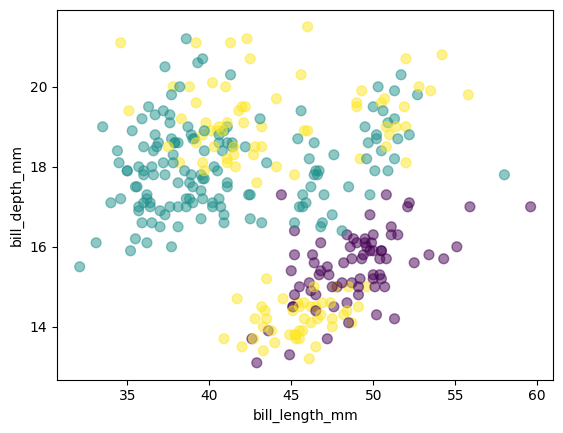

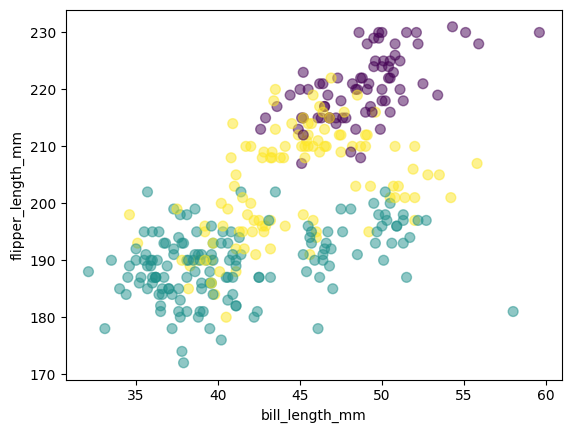

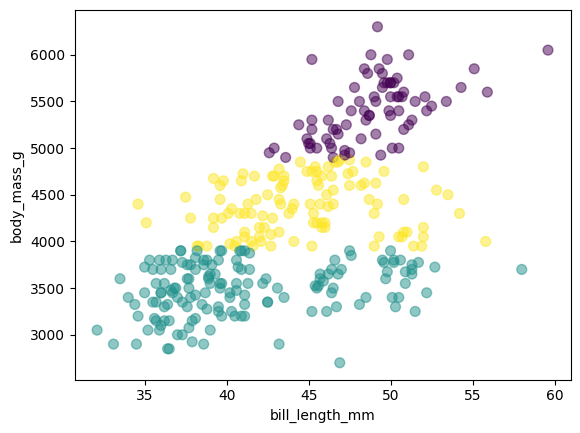

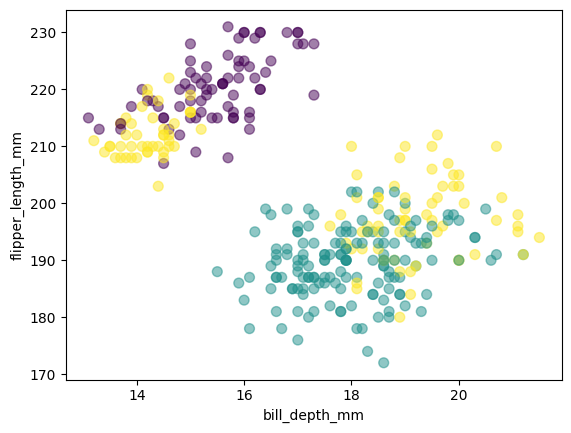

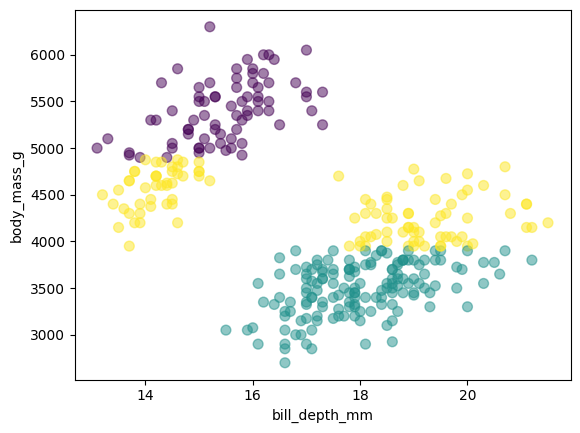

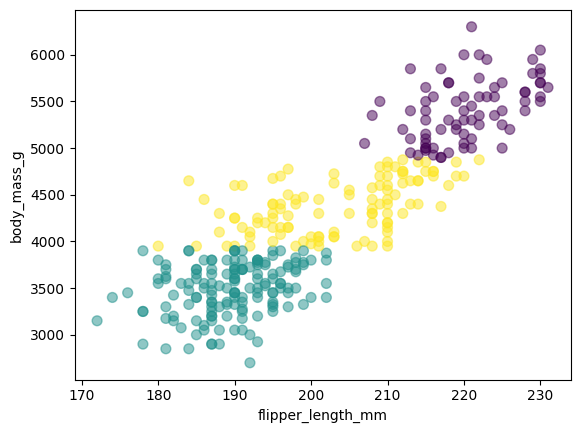

In [26]:
# K-MEANS CLUSTERING

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3).fit(numerical_penguins)
centroids = kmeans.cluster_centers_
print(centroids)

features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

# FOR BELOW CHARTS: UNCOMMENT THE COMMENTED LINES TO VISUALIZE INTIAL CENTROID LOCATIONS

# Bill Length v Bill Depth
plt.scatter(numerical_penguins['bill_length_mm'], numerical_penguins['bill_depth_mm'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('bill_length_mm')
plt.ylabel("bill_depth_mm")
# plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# Bill Length v Flipper Length
plt.scatter(numerical_penguins['bill_length_mm'], numerical_penguins['flipper_length_mm'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('bill_length_mm')
plt.ylabel("flipper_length_mm")
# plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# Bill Length v Body Mass
plt.scatter(numerical_penguins['bill_length_mm'], numerical_penguins['body_mass_g'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('bill_length_mm')
plt.ylabel("body_mass_g")
# plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# Bill Depth v Flipper Length
plt.scatter(numerical_penguins['bill_depth_mm'], numerical_penguins['flipper_length_mm'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('bill_depth_mm')
plt.ylabel("flipper_length_mm")
# plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# Bill Depth v Body Mass
plt.scatter(numerical_penguins['bill_depth_mm'], numerical_penguins['body_mass_g'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('bill_depth_mm')
plt.ylabel("body_mass_g")
# plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

# Flipper Length v Body Mass
plt.scatter(numerical_penguins['flipper_length_mm'], numerical_penguins['body_mass_g'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel('flipper_length_mm')
plt.ylabel("body_mass_g")
# plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()

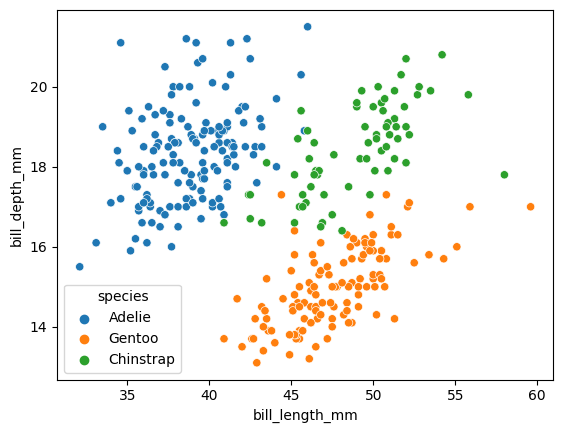

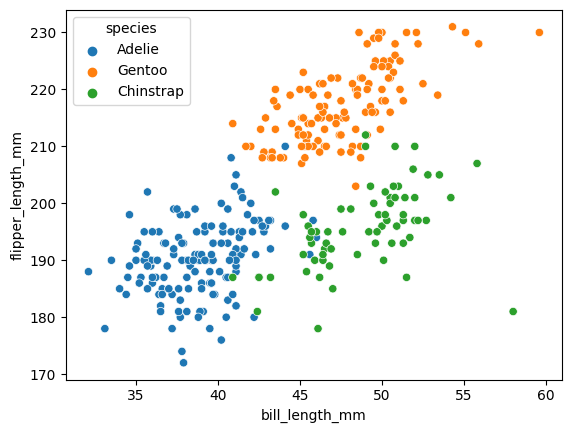

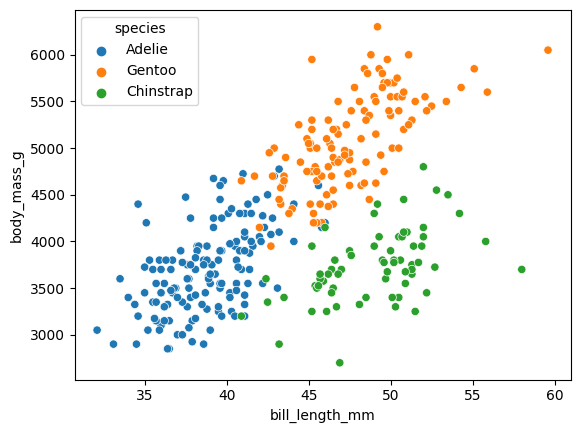

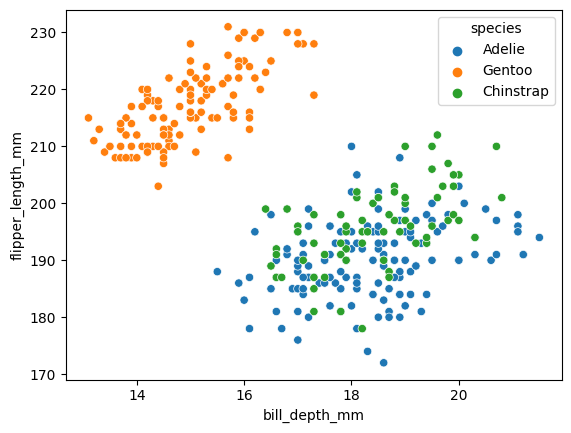

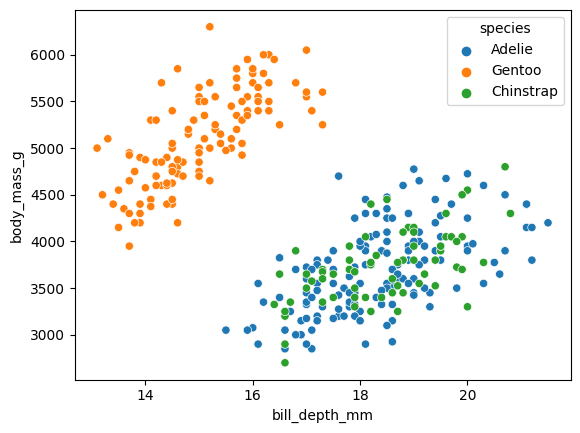

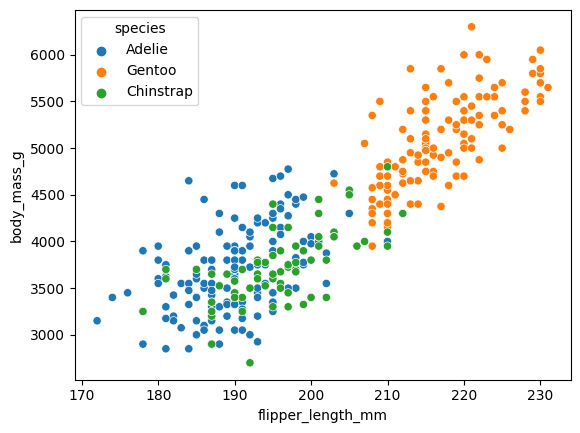

In [27]:
# EXPECTED CLASSES

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_no_na, hue='species')
plt.show()

sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', data=penguins_no_na, hue='species')
plt.show()

sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=penguins_no_na, hue='species')
plt.show()

sns.scatterplot(x='bill_depth_mm', y='flipper_length_mm', data=penguins_no_na, hue='species')
plt.show()

sns.scatterplot(x='bill_depth_mm', y='body_mass_g', data=penguins_no_na, hue='species')
plt.show()

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins_no_na, hue='species')
plt.show()



In [28]:
# Inspired by reneshbedre.com/blog/dbscan-python.html

from sklearn.cluster import DBSCAN
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# eps appears to have a major change at 50 vs 51. Goes from 21 clusters and 37 noise points at eps = 50 to 3 clusters and 3 noise points at eps = 51.
db = DBSCAN(eps = 51, min_samples = 4).fit(numerical_penguins)
# db.labels_

# set(db.labels_)
Counter(db.labels_)

Counter({0: 319, 1: 7, 2: 4, -1: 3})

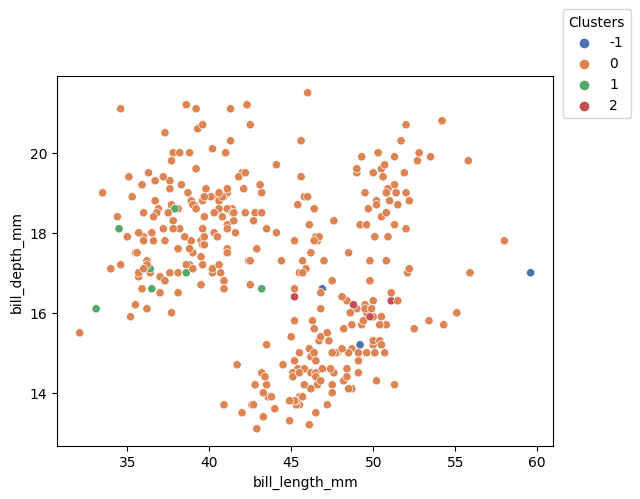

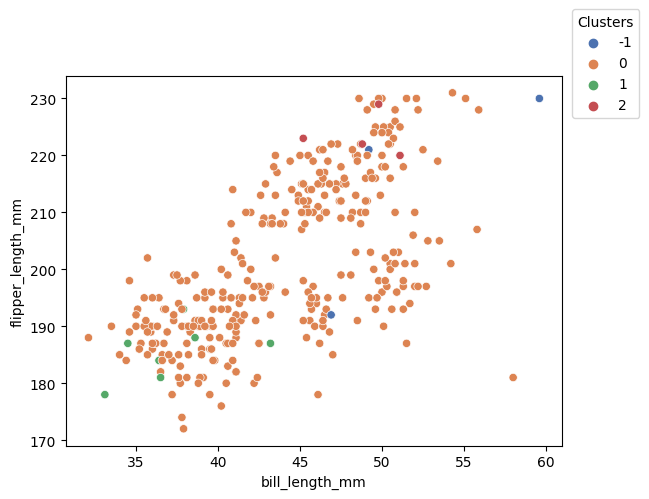

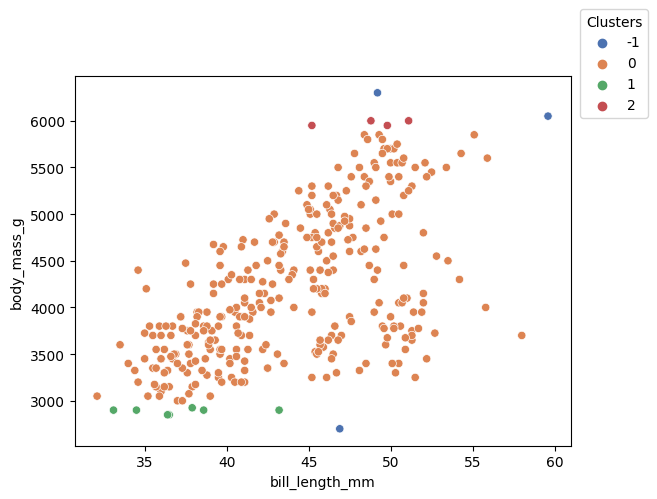

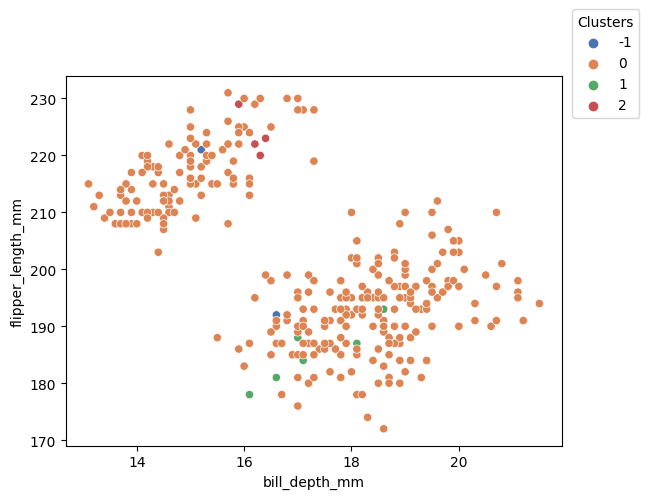

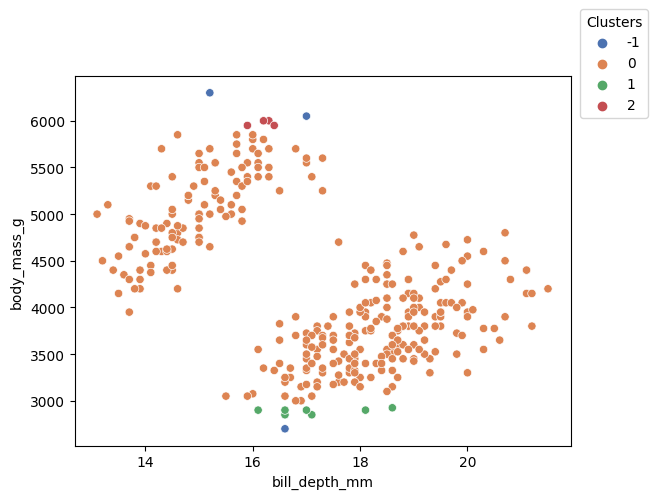

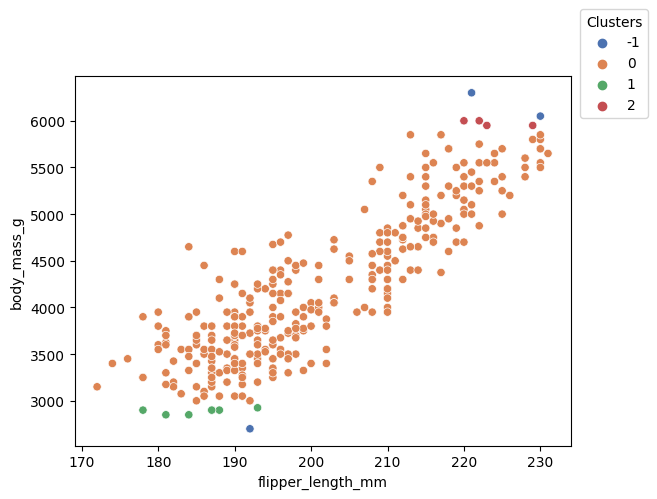

In [29]:
p = sns.scatterplot(data = numerical_penguins, x = "bill_length_mm", y = "bill_depth_mm", hue = db.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

p = sns.scatterplot(data = numerical_penguins, x = "bill_length_mm", y = "flipper_length_mm", hue = db.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

p = sns.scatterplot(data = numerical_penguins, x = "bill_length_mm", y = "body_mass_g", hue = db.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

p = sns.scatterplot(data = numerical_penguins, x = "bill_depth_mm", y = "flipper_length_mm", hue = db.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

p = sns.scatterplot(data = numerical_penguins, x = "bill_depth_mm", y = "body_mass_g", hue = db.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

p = sns.scatterplot(data = numerical_penguins, x = "flipper_length_mm", y = "body_mass_g", hue = db.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

## Anomaly Detection Data Cleanup

For anomaly detection, I wanted to use the same kind of dummy variable dataframe I used for classification to highlight the penguins determined to be anomalies.

In [34]:
dummies_anomaly = dummies.copy()
dummies_anomaly

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
1,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True
2,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True
3,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True
5,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True
6,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
340,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False
341,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False
342,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False
343,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False


## Anomaly Detection
#### Isolation Forest

In [36]:
from sklearn.ensemble import IsolationForest

my_forest = IsolationForest(contamination = float(0.1), random_state = 8)

my_forest.fit(dummies_anomaly)

anomaly_scores = my_forest.decision_function(dummies_anomaly)
dummies_anomaly['anomaly'] = my_forest.predict(dummies_anomaly)
dummies_anomaly['anomaly scores'] = anomaly_scores

dummies_anomaly



/Users/jscook/Desktop/CodingProjects/Data Mining Final Project/env/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,anomaly,anomaly scores
1,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,1,0.059707
2,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,1,0.068578
3,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,1,0.056773
5,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,1,0.050750
6,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,1,0.050651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,-1,-0.054269
341,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,1,0.048039
342,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,1,0.084349
343,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,1,0.052811


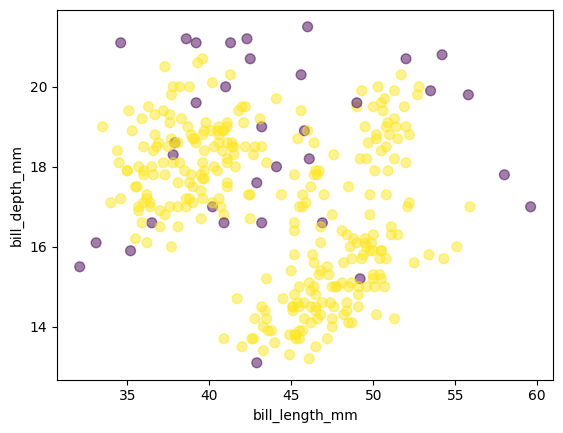

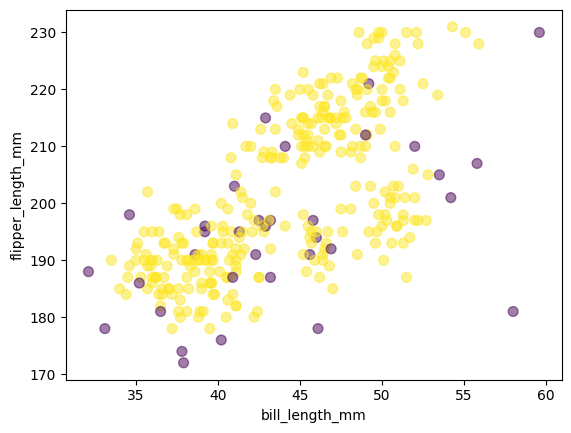

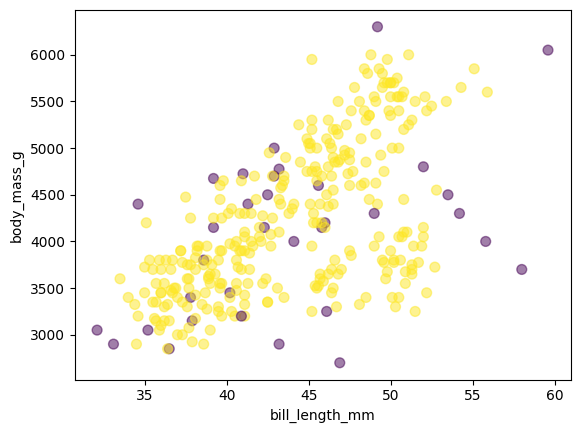

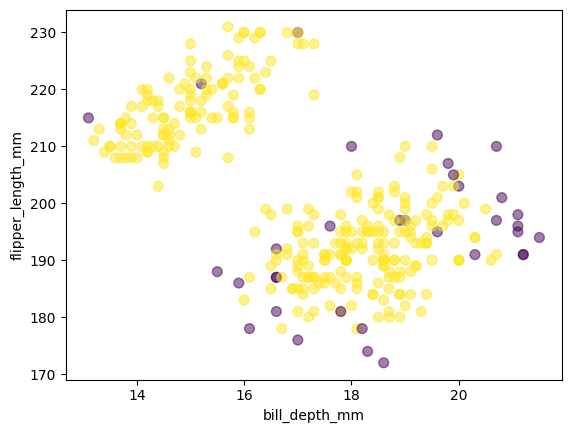

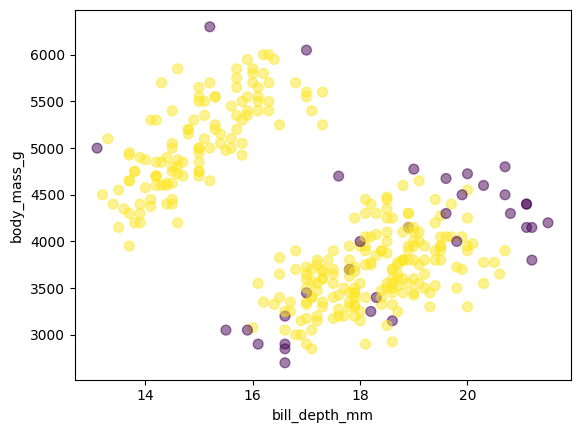

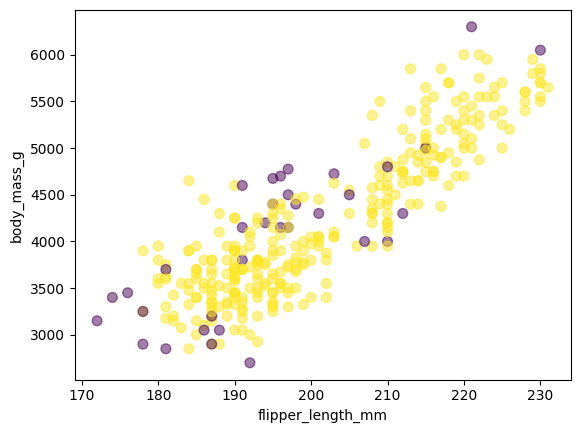

In [37]:
plt.scatter(dummies_anomaly['bill_length_mm'], dummies_anomaly['bill_depth_mm'], c = dummies_anomaly['anomaly'], s=50, alpha=0.5)
plt.xlabel('bill_length_mm')
plt.ylabel("bill_depth_mm")
plt.show()

plt.scatter(dummies_anomaly['bill_length_mm'], dummies_anomaly['flipper_length_mm'], c = dummies_anomaly['anomaly'], s=50, alpha=0.5)
plt.xlabel('bill_length_mm')
plt.ylabel("flipper_length_mm")
plt.show()

plt.scatter(dummies_anomaly['bill_length_mm'], dummies_anomaly['body_mass_g'], c = dummies_anomaly['anomaly'], s=50, alpha=0.5)
plt.xlabel('bill_length_mm')
plt.ylabel("body_mass_g")
plt.show()

plt.scatter(dummies_anomaly['bill_depth_mm'], dummies_anomaly['flipper_length_mm'], c = dummies_anomaly['anomaly'], s=50, alpha=0.5)
plt.xlabel('bill_depth_mm')
plt.ylabel("flipper_length_mm")
plt.show()

plt.scatter(dummies_anomaly['bill_depth_mm'], dummies_anomaly['body_mass_g'], c = dummies_anomaly['anomaly'], s=50, alpha=0.5)
plt.xlabel('bill_depth_mm')
plt.ylabel("body_mass_g")
plt.show()

plt.scatter(dummies_anomaly['flipper_length_mm'], dummies_anomaly['body_mass_g'], c = dummies_anomaly['anomaly'], s=50, alpha=0.5)
plt.xlabel('flipper_length_mm')
plt.ylabel("body_mass_g")
plt.show()